In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [36]:
titanic_data =pd.read_csv('train.csv')

In [37]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
titanic_data.shape

(891, 12)

In [40]:
X = titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]
y = titanic_data.Survived
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S


In [41]:
X = X.fillna({'Age':X.Age.median()})
X = pd.get_dummies(X) 
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1


In [42]:
clf = tree.DecisionTreeClassifier(criterion='entropy' , max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
from sklearn.model_selection import train_test_split
X_test , X_train , y_test , y_train = train_test_split(X,y ,test_size = 0.33 , random_state =42)

In [45]:
#clf.score(X_test,y_test)

In [52]:
max_depth_values =range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy' , max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cros_val =  cross_val_score(clf, X_train , y_train , cv=5).mean()
    temp_score_data = pd.DataFrame({'max_data':[max_depth],'train_score':[train_score], 'test_score':[test_score] , 'cross_val_score':[mean_cros_val]})
    scores_data =scores_data.append(temp_score_data)

In [49]:
scores_data.head(1)

,max_data,train_score,test_score
0,1,0.79661,0.781879


In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train , y_train , cv=5).mean()
#cross_val_scores_data_long.query('set_type == "cross_val_score"').head(5)

0.7966101694915254

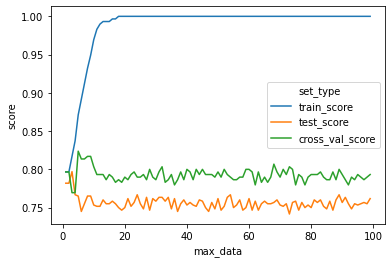

In [56]:
cross_val_scores_data_long = pd.melt(scores_data, id_vars=['max_data'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
sns.lineplot(x="max_data", y="score", hue="set_type", data=cross_val_scores_data_long)

In [58]:
from sklearn.model_selection import GridSearchCV # Автоподбор парметров дерева
clf = DecisionTreeClassifier()
parametrs = {'criterion':['entropy' , 'gini'], "max_depth" :range(1,30)}

grid_search = GridSearchCV(clf , parametrs, cv=5)

In [64]:
grid_search.fit(X_train,y_train)
clf = grid_search.best_estimator_

In [65]:
clf.score(X_test,y_test)

0.7651006711409396

In [84]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.664

In [85]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.7477477477477478

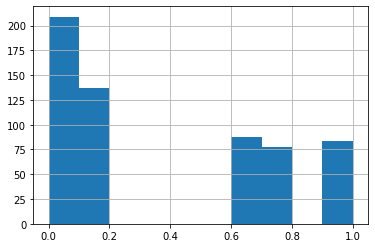

In [71]:
y_pred_prob = clf.predict_proba(X_test)
pd.Series(y_pred_prob[:,1]).hist()

In [83]:
y_pred = np.where(y_pred_prob[:,1] > 0.2,1,0)
  

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV # Автоподбор парметров дерева

iris = load_iris()
X = iris.data
y = iris.target
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.25 )
dt = DecisionTreeClassifier()

parametrs = {'min_samples_split':range(2,10), "max_depth" :range(1,10) , 'min_samples_leaf':range(1,10)}
grid_search = GridSearchCV(dt, parametrs, cv=5)
grid_search.fit(X_train,y_train)
dt = grid_search.best_estimator_

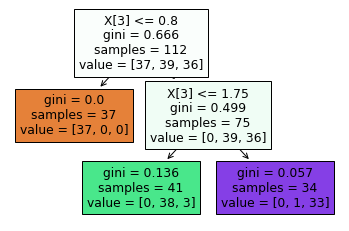

In [24]:
p = tree.plot_tree(dt, filled=True)

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV # Автоподбор парметров дерева

iris = load_iris()
X = iris.data
y = iris.target
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.25 )
dt = DecisionTreeClassifier()

parametrs = {'min_samples_split':range(2,10), "max_depth" :range(1,10) , 'min_samples_leaf':range(1,10)}
grid_search = RandomizedSearchCV(dt, parametrs, cv=5)
grid_search.fit(X_train,y_train)
dt = grid_search.best_estimator_

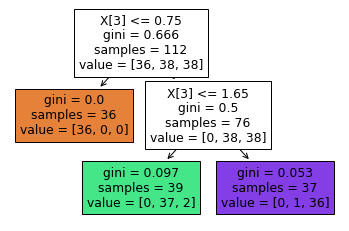

In [22]:
p = tree.plot_tree(dt, filled=True)X

In [124]:
hh =best_clf.predict(X_test)
l = list(hh)
l.count('собачка')
#l.count('котик')

59

In [32]:
X = df[['year','length','commas','exclamations','colons','hyphens']]
y = df.artist
    from sklearn.model_selection import cross_val_score
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import precision_score
    from sklearn.model_selection import train_test_split

X_test , X_train , y_test , y_train = train_test_split(X,y ,test_size = 0.33 , random_state =42)


clf = tree.DecisionTreeClassifier(criterion='entropy' , max_depth=5)
cross_val_score(clf, X_train , y_train , cv=3).mean()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
precision_score(y_test,predictions,average='micro')

0.6721991701244814

In [8]:
dt = pd.read_csv('train_data_tree.csv')
dt.head()
y = dt.num
X = dt[['sex','exang']]

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

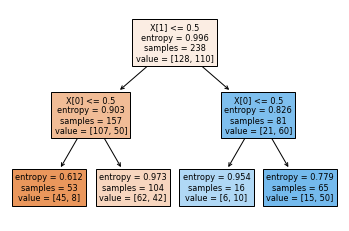

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)
tree.plot_tree(clf, filled=True)

In [12]:
clf.tree_.n_node_samples



array([238, 157,  53, 104,  81,  16,  65], dtype=int64)

In [13]:
clf.tree_.impurity

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

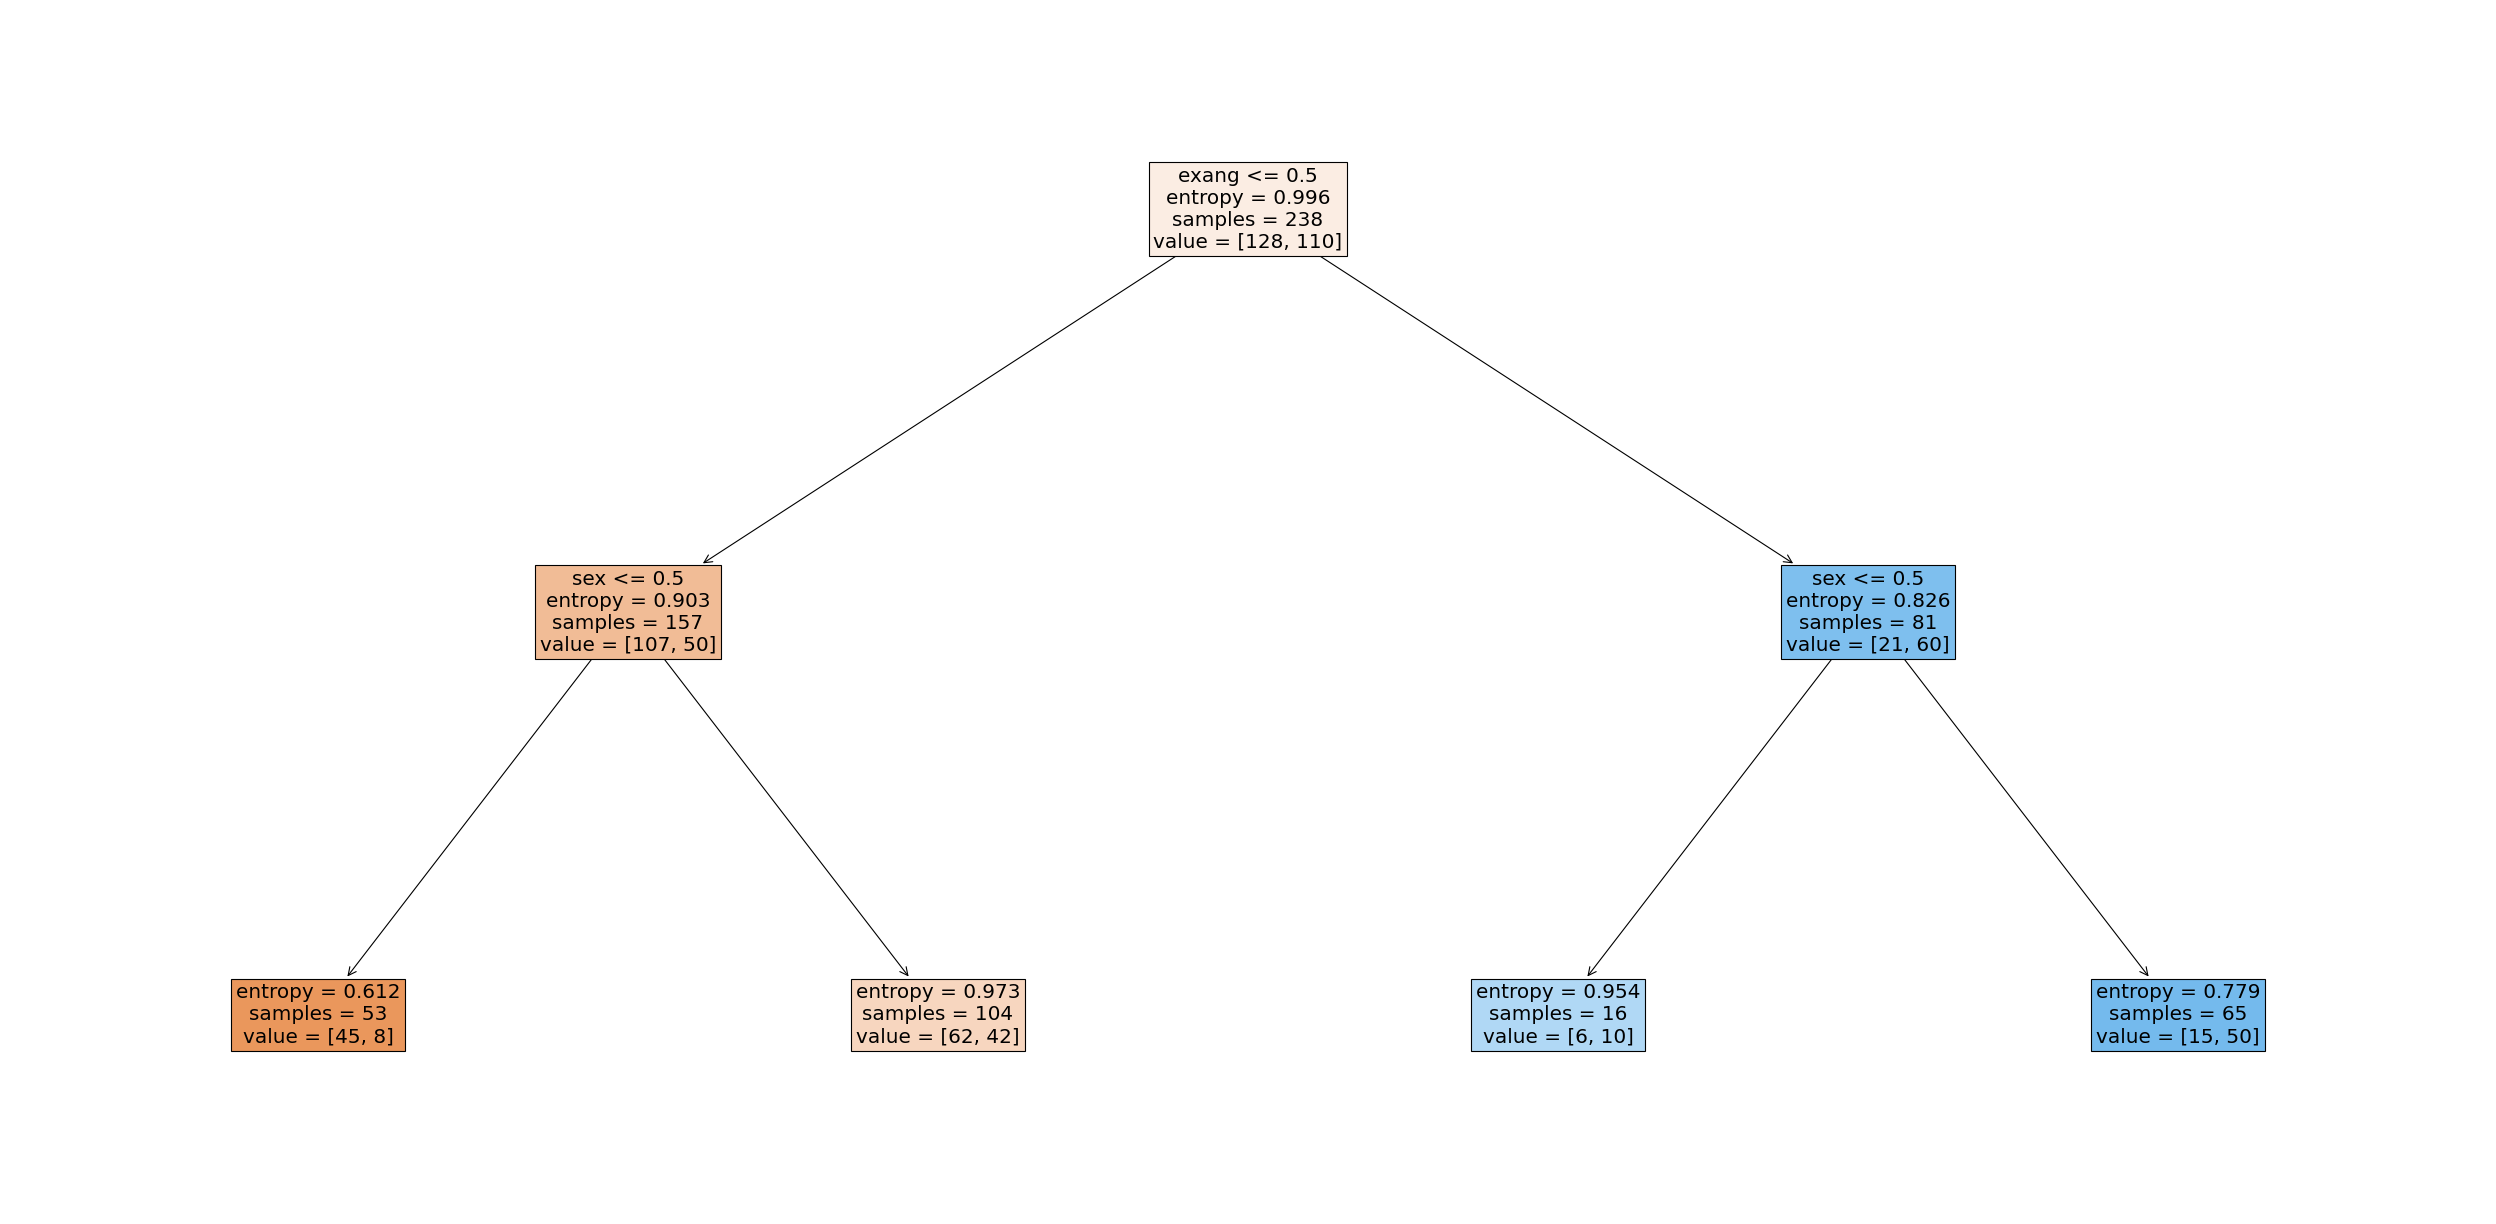

In [14]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=18,filled=True,feature_names=list(X))